# Energy Economics - Bonus Project

## Electric Vehicles @ California

Renuka Gajaralwar,
Het Nilesh Gandhi,
Saikiran Joshi,
Hithesh Karanam,
Taher Muhammedali

In [54]:
# Importing the required libraries
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import *
import numpy as np

### Bass Diffussion Model Analysis

In [55]:
# Creating an empty dataframe and adding the Years and Market volume column (L_t)
df = pd.DataFrame()
# Creating a list of the years from 2015-2045
year = np.arange(2015, 2046, 1).tolist()
df['Year'] = year
df['L_t'] = 0

In [56]:
# Defining p, q, M for our model
p = 0.0003
q = 0.35
m = 29 * 1e6

In [57]:
df.at[0, 'L_t'] = 190000 # Setting the value of L_t for the first year of the model as per CA Energy Commission

# Calculating the market volume based on Bass Diffusion Model for each year, where it considers the market volume of the previous year.
for i in range(1, len(df)):
    df.loc[i, 'L_t'] = (df.loc[i-1, 'L_t']) + ((p + (q/m)*(df.loc[i-1, 'L_t'])) * (m-(df.loc[i-1, 'L_t'])))

df['L_t_percent'] = (df['L_t'] / m)*100 # Calculating the market volume percent with respect to the market potential
df.head()

,Year,L_t,L_t_percent
0,2015,190000.000000,0.655172
1,2016,264707.310345,0.912784
2,2017,365129.784840,1.259068
3,2018,499906.639014,1.723816
4,2019,680407.875964,2.346234


In [58]:
# To find the year in which the market potential crosses 99% mark
for i in range (0, len(df)):
    if df.loc[i, 'L_t_percent'] > 99:
        year99 = df.loc[i, 'Year']
        break

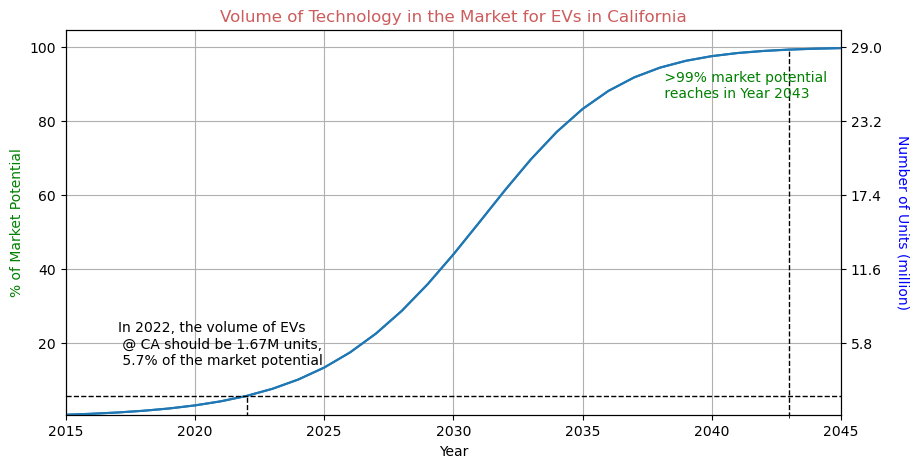

In [59]:
# Code for plotting

fig, ax1 = plt.subplots(figsize = (10, 5))
ax2 = ax1.twinx() # Creating a dual axis figure to show both Market volume & percent
y1 = df['L_t_percent']
y2 = df['L_t']
x = df['Year']
ax1.plot(x, y1)
ax2.plot(x, y2)


# Plotting a vertical line to refer the year where market potential is >99%
plt.vlines(x = year99,
           ymin = 0,
           ymax = df.loc[df['Year'] == year99, 'L_t'],
           color = "black",
           linestyle = "dashed",
           linewidth = 1)

# Writing the text for 99% market potential
plt.text(x = year99-5,
         y = df.loc[df['Year'] == year99, 'L_t'].item() - 5e6,
         s = f" >99% market potential \n reaches in Year {year99} \n",
         color = 'g')

# Plotting a horizontal line for market volume in 2022
plt.hlines(y = df.loc[df['Year'] == 2022, 'L_t'],
           xmin = df["Year"].min(),
           xmax = df["Year"].max(),
           color = "black",
           linestyle = "dashed",
           linewidth = 1)

# Plotting a vertical line to refer the year 2022
plt.vlines(x = 2022,
           ymin = 0,
           ymax = df.loc[df['Year'] == 2022, 'L_t'],
           color = "black",
           linestyle = "dashed",
           linewidth = 1)

# Writing the text for current market situation
plt.text(x = 2017,
         y = df.loc[df['Year'] == 2022, 'L_t'].item() + 2.5e6,
         s = f"In 2022, the volume of EVs \n @ CA should be "
             f"{round(df.loc[df['Year'] == 2022, 'L_t'].item()/1e6,2)}M units, \n {round(df.loc[df['Year'] == 2022, 'L_t_percent'].item(),1)}% of the market potential",
         color = 'black')

# Setting limits, labels and other attributes of the plot
plt.title('Volume of Technology in the Market for EVs in California', color = 'indianred')

ax1.set_xlabel('Year')
ax1.set_ylabel('% of Market Potential', color = 'g')
ax2.set_ylabel('Number of Units (million)', color = 'b', rotation = -90, labelpad=20)

def millions_formatter(x, pos):
    return f'{x / 1000000}'
ax2.yaxis.set_major_locator(MultipleLocator(m/5))
ax2.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax1.set_xticks([2022], minor=True)
ax1.set_xticks([year99], minor=True)

plt.xlim(df["Year"].min(), df["Year"].max())
ax2.set_ylim(df["L_t"].min(), )
ax1.set_ylim(df["L_t_percent"].min(),)

ax1.grid(True)

# plt.savefig('vtm.png')

Text(2032, 30.74690563804596, 'Share in 2022:\nCurrent Model = 5.7% \nHistorical Model = 11.0%')

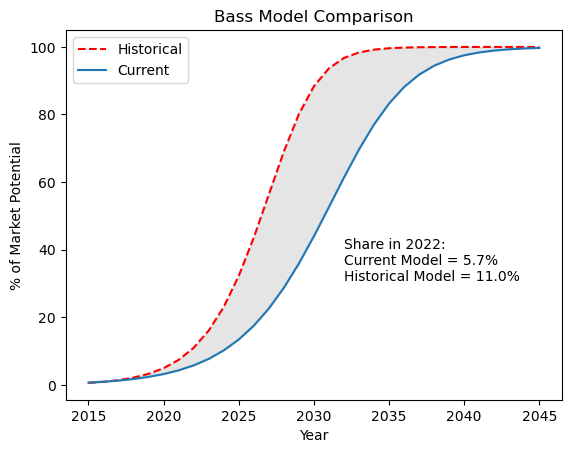

In [60]:
# Plotting and comparing with a Historical model
px = 0.00043
qx = 0.517
mx = 24.8 * 1e6
yearx = np.arange(2012, 2046, 1).tolist() # Start year for historical model is 2012

dfx = pd.DataFrame()
dfx['Year'] = yearx
dfx['L_t'] = 0

dfx.at[0, 'L_t'] = 25000 # Market volume in 2012

for i in range(1, len(dfx)):
    dfx.loc[i, 'L_t'] = (dfx.loc[i-1, 'L_t']) + ((px + (qx/mx)*(dfx.loc[i-1, 'L_t'])) * (mx-(dfx.loc[i-1, 'L_t'])))



dfx['L_t_percent'] = (dfx['L_t'] / mx)*100

dfx = dfx.iloc[3:] # Removing 2012-2014 values in order to plot both models on same x-axis

plt.plot(dfx['Year'], dfx['L_t_percent'], label = 'Historical', linestyle = '--', color = 'r')
plt.plot(df['Year'], df['L_t_percent'], label = 'Current')
plt.legend()
plt.fill_between(df['Year'],df['L_t_percent'], dfx['L_t_percent'], color='grey', alpha=0.2)
plt.title('Bass Model Comparison')
plt.xlabel('Year')
plt.ylabel('% of Market Potential')
plt.text(x = 2032,
         y = df.loc[df['Year'] == 2022, 'L_t_percent'].item() + 25,
         s = f"Share in 2022:\n"
             f"Current Model = {round(df.loc[df['Year'] == 2022, 'L_t_percent'].item(),1)}% \n"
             f"Historical Model = {round(dfx.loc[dfx['Year'] == 2022, 'L_t_percent'].item(),1)}%",
         color = 'black')

# plt.savefig('hist.png')

## p-Sensitivity Analysis

In [61]:
p_new = [p/10, p/5, p/2, p, p*2, p*5, p*10 ] # Creating a list of varying p values with reference to our model p
p_new =[round(num, 5) for num in p_new]

# Repeating the previous steps and creating a new dataframe
p_df = pd.DataFrame()
p_df['Year'] = year
p_df['L_t'] = 0
p_df.at[0, 'L_t'] = 190000

# For loop which calculates the market volume % for each p value in the above list
for pa in p_new:

    for i in range(1, len(p_df)):
        p_df.loc[i, 'L_t'] = (p_df.loc[i-1, 'L_t']) + ((pa + (q/m)*(p_df.loc[i-1, 'L_t'])) * (m-(p_df.loc[i-1, 'L_t'])))

    p_df['L_t_percent'] = (p_df['L_t'] / m)*100

    # Column heading labelling
    newcolname = "p=" + str(pa)
    p_df.rename(columns = {'L_t_percent': newcolname}, inplace = True)

# Cleaning the table for easy viewing and plot
p_df = p_df.drop(['L_t'], axis=1)
p_df = p_df.set_index('Year')

p_df.head()

,p=3e-05,p=6e-05,p=0.00015,p=0.0003,p=0.0006,p=0.0015,p=0.003
Year,,,,,,,
2015,0.655172,0.655172,0.655172,0.655172,0.655172,0.655172,0.655172
2016,0.885961,0.888941,0.897882,0.912784,0.942587,1.031998,1.181015
2017,1.196273,1.203251,1.224184,1.259068,1.328818,1.537921,1.885945
2018,1.612924,1.625250,1.662220,1.723816,1.846926,2.215609,2.827919
2019,2.171294,2.190745,2.249078,2.346234,2.540303,3.120567,4.081218


(0.0, 100.0)

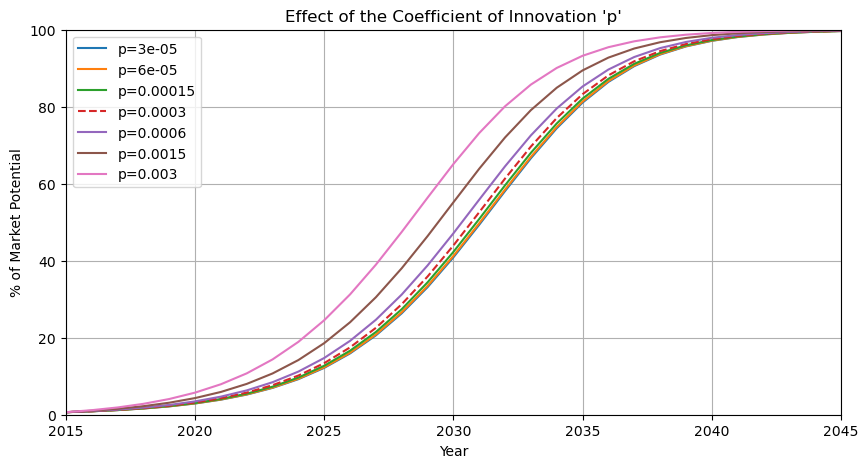

In [62]:
# Plotting for p-sensitivity analysis
p_df.plot(kind="line", figsize = (10, 5),style=['','','','--','','','']) # Creating  a dashed plot for our model p

# Setting limits, labels and other attributes of the plot
plt.title("Effect of the Coefficient of Innovation 'p'")
plt.xlabel('Year')
plt.ylabel('% of Market Potential')
plt.grid(True)
plt.xlim(df["Year"].min(), df["Year"].max())
plt.ylim(0, 100)
# plt.savefig('pan.png')

## q-Sensitivity Analysis

In [63]:
q_new = [q-0.3, q-0.2, q-0.1, q, q+0.1, q+0.2, q+0.3 ] # Creating a list of varying p values with reference to our model q
q_new =[round(num, 2) for num in q_new]

# Repeating the previous steps and creating a new dataframe
q_df = pd.DataFrame()
q_df['Year'] = year
q_df['L_t'] = 0
q_df.at[0, 'L_t'] = 190000

for qa in q_new:

    for i in range(1, len(p_df)):
        q_df.loc[i, 'L_t'] = (q_df.loc[i-1, 'L_t']) + ((p + (qa/m)*(q_df.loc[i-1, 'L_t'])) * (m-(q_df.loc[i-1, 'L_t'])))

    q_df['L_t_percent'] = (q_df['L_t'] / m)*100

    # Column heading labelling
    newcolname = "q=" + str(qa)
    q_df.rename(columns = {'L_t_percent': newcolname}, inplace = True)

# Cleaning the table for easy viewing and plot
q_df = q_df.drop(['L_t'], axis=1)
q_df = q_df.set_index('Year')

q_df.head()

,q=0.05,q=0.15,q=0.25,q=0.35,q=0.45,q=0.55,q=0.65
Year,,,,,,,
2015,0.655172,0.655172,0.655172,0.655172,0.655172,0.655172,0.655172
2016,0.717520,0.782608,0.847696,0.912784,0.977872,1.042960,1.108048
2017,0.782923,0.928846,1.087569,1.259068,1.443318,1.640292,1.849966
2018,0.851528,1.096600,1.386178,1.723816,2.113003,2.557163,3.059643
2019,0.923486,1.288957,1.757503,2.346234,3.073130,3.956870,5.016645


(0.0, 100.0)

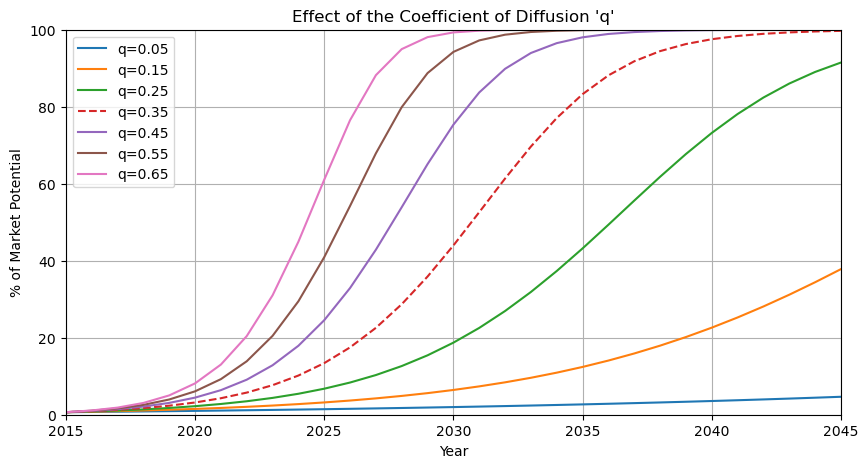

In [64]:
# Plotting for p-sensitivity analysis
q_df.plot(kind="line", figsize = (10, 5), style=['','','','--','','',''])  # Creating  a dashed plot for our model q

# Setting limits, labels and other attributes of the plot
plt.title("Effect of the Coefficient of Diffusion 'q'")
plt.xlabel('Year')
plt.ylabel('% of Market Potential')
plt.grid(True)
plt.xlim(df["Year"].min(), df["Year"].max())
plt.ylim(0, 100)
# plt.savefig('qan.png')

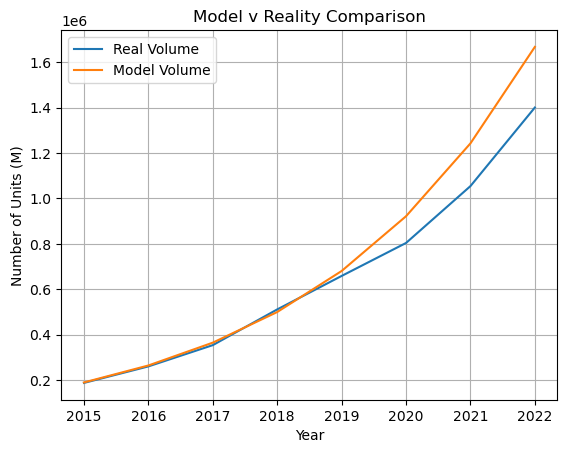

In [65]:
# Creating an empty dataframe and adding the Years and Market volume column (L_t)
real_df = pd.DataFrame()
# Creating a list of the years from 2015-2045
yearx = np.arange(2015, 2023, 1).tolist()
real_df['Year'] = yearx
real_df['Real Volume'] = [187957, 260640, 354227, 511370, 658717, 803816, 1054095, 1399913]
real_df['Model Volume'] = df['L_t'].loc[0:7]
real_df = real_df.set_index('Year')
real_df.plot()
plt.title("Model v Reality Comparison")
plt.xlabel('Year')
plt.ylabel('Number of Units (M)')
plt.grid(True)
# plt.savefig('mvr.png')